#import libraries

In [1]:
import pandas as pd
import json
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import spacy
from sklearn.feature_extraction.text import CountVectorizer
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

#import yelp review data set and save data into csv file

In [2]:
# Once you excute this code sucessfully no need to run it again
with open('yelp_academic_dataset_review.json', 'r', encoding='utf-8') as json_type_file:
    data = [json.loads(line) for line in json_type_file]

In [3]:
# count length of the array
number_of_rows = len(data)
number_of_rows

6990280

In [4]:
# add data into a dataframe
df = pd.DataFrame(data)

In [5]:
df.head(10)

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5.0,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3.0,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5.0,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4.0,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15
5,JrIxlS1TzJ-iCu79ul40cQ,eUta8W_HdHMXPzLBBZhL1A,04UD14gamNjLY0IDYVhHJg,1.0,1,2,1,I am a long term frequent customer of this est...,2015-09-23 23:10:31
6,6AxgBCNX_PNTOxmbRSwcKQ,r3zeYsv1XFBRA4dJpL78cw,gmjsEdUsKpj9Xxu6pdjH0g,5.0,0,2,0,Loved this tour! I grabbed a groupon and the p...,2015-01-03 23:21:18
7,_ZeMknuYdlQcUqng_Im3yg,yfFzsLmaWF2d4Sr0UNbBgg,LHSTtnW3YHCeUkRDGyJOyw,5.0,2,0,0,Amazingly amazing wings and homemade bleu chee...,2015-08-07 02:29:16
8,ZKvDG2sBvHVdF5oBNUOpAQ,wSTuiTk-sKNdcFyprzZAjg,B5XSoSG3SfvQGtKEGQ1tSQ,3.0,1,1,0,This easter instead of going to Lopez Lake we ...,2016-03-30 22:46:33
9,pUycOfUwM8vqX7KjRRhUEA,59MxRhNVhU9MYndMkz0wtw,gebiRewfieSdtt17PTW6Zg,3.0,0,0,0,Had a party of 6 here for hibachi. Our waitres...,2016-07-25 07:31:06


In [6]:
# save it in a csv file
df.to_csv('yelp_reviews.csv', index=False)

In [2]:
# import csv file
df1 = pd.read_csv('yelp_reviews.csv')

In [3]:
df1.shape

(6990280, 9)

#data cleaning

In [4]:
df1.head(6)

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5.0,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3.0,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5.0,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4.0,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15
5,JrIxlS1TzJ-iCu79ul40cQ,eUta8W_HdHMXPzLBBZhL1A,04UD14gamNjLY0IDYVhHJg,1.0,1,2,1,I am a long term frequent customer of this est...,2015-09-23 23:10:31


In [5]:
df2 = df1.drop(['review_id','user_id','business_id','useful','funny','cool','date'] ,axis=1 , inplace=False)

In [6]:
df2.head(6)

,stars,text
0,3.0,"If you decide to eat here, just be aware it is..."
1,5.0,I've taken a lot of spin classes over the year...
2,3.0,Family diner. Had the buffet. Eclectic assortm...
3,5.0,"Wow! Yummy, different, delicious. Our favo..."
4,4.0,Cute interior and owner (?) gave us tour of up...
5,1.0,I am a long term frequent customer of this est...


In [7]:
df2.isnull().sum()

stars    0
text     0
dtype: int64

In [8]:
df2.duplicated().sum()

14858

In [9]:
df3 = df2.drop_duplicates(inplace=False)

In [10]:
df3.duplicated().sum()

0

In [11]:
df3.head(6)

,stars,text
0,3.0,"If you decide to eat here, just be aware it is..."
1,5.0,I've taken a lot of spin classes over the year...
2,3.0,Family diner. Had the buffet. Eclectic assortm...
3,5.0,"Wow! Yummy, different, delicious. Our favo..."
4,4.0,Cute interior and owner (?) gave us tour of up...
5,1.0,I am a long term frequent customer of this est...


<Axes: title={'center': 'Review Stars'}, xlabel='stars'>

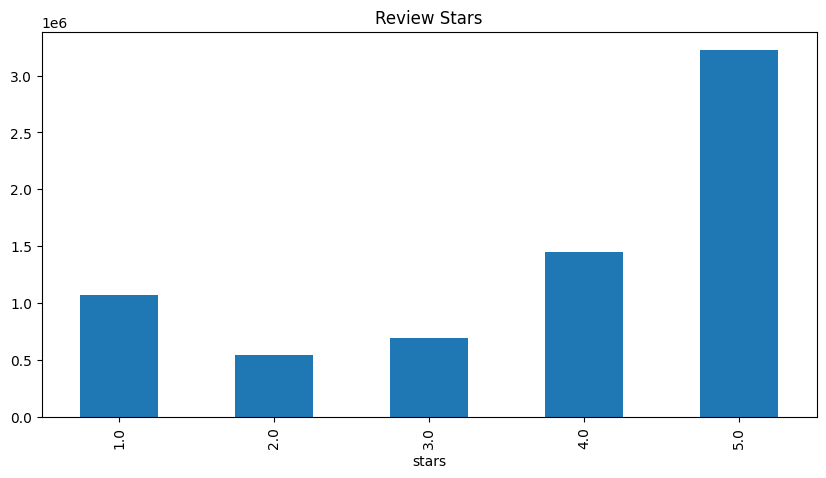

In [12]:
df3['stars'].value_counts().sort_index().plot(kind='bar', title="Review Stars", figsize=(10,5))

In [13]:
# 0 - negative
# 1 - neutral
# 2 - positive

# Function to convert score to sentiment
def sentiment(rating):
    
    rating = int(rating)
    # Convert to class
    if rating <= 2:
        return 0
    elif rating == 3:
        return 1
    else:
        return 2

# Apply to the dataset 
df3['sentiment'] = df3['stars'].apply(sentiment)

C:\Users\Genuka K Manthila\AppData\Local\Temp\ipykernel_22336\4007003634.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['sentiment'] = df3['stars'].apply(sentiment)


In [14]:
df3.head(5)

,stars,text,sentiment
0,3.0,"If you decide to eat here, just be aware it is...",1
1,5.0,I've taken a lot of spin classes over the year...,2
2,3.0,Family diner. Had the buffet. Eclectic assortm...,1
3,5.0,"Wow! Yummy, different, delicious. Our favo...",2
4,4.0,Cute interior and owner (?) gave us tour of up...,2


In [15]:
df3['sentiment'].value_counts().sort_index()

sentiment
0    1609825
1     691016
2    4674581
Name: count, dtype: int64

In [16]:
df4=df3.iloc[:10000]
df4

,stars,text,sentiment
0,3.0,"If you decide to eat here, just be aware it is...",1
1,5.0,I've taken a lot of spin classes over the year...,2
2,3.0,Family diner. Had the buffet. Eclectic assortm...,1
3,5.0,"Wow! Yummy, different, delicious. Our favo...",2
4,4.0,Cute interior and owner (?) gave us tour of up...,2
...,...,...,...
9995,5.0,Excellent food and service. The place is funct...,2
9996,5.0,Just about to get tucked into a meatloaf that ...,2
9997,5.0,Outstanding customer service! And my car is dr...,2
9998,5.0,I and my husband went here for Dinner one day ...,2


In [17]:
df4['sentiment'].value_counts().sort_index()

sentiment
0    1842
1    1139
2    7019
Name: count, dtype: int64

#data preprocessing

In [18]:
# Initialize SpaCy
nlp = spacy.load('en_core_web_sm')

In [19]:
text = df4['text']
text

0       If you decide to eat here, just be aware it is...
1       I've taken a lot of spin classes over the year...
2       Family diner. Had the buffet. Eclectic assortm...
3       Wow!  Yummy, different,  delicious.   Our favo...
4       Cute interior and owner (?) gave us tour of up...
                              ...                        
9995    Excellent food and service. The place is funct...
9996    Just about to get tucked into a meatloaf that ...
9997    Outstanding customer service! And my car is dr...
9998    I and my husband went here for Dinner one day ...
9999    I saw Big Data when they came to town at the K...
Name: text, Length: 10000, dtype: object

In [20]:
# # Define a function to process text using spaCy

# def process_text_spacy(text):
#     count = 0
#     # Process the text using spaCy
#     doc = nlp(text)
    
#     # Remove stopwords and lemmatize
#     processed_tokens = [token.lemma_ for token in doc if not token.is_stop]
    
#     # Join the tokens back into a string
#     processed_text = ' '.join(processed_tokens)
#     count = count+ 1
#     print('counter',count,processed_text)
#     return processed_text

# # Apply the function to the 'text' column in your DataFrame
# df4['processed_text'] = df4['text'].apply(process_text_spacy)

counter 1 decide eat , aware go 2 hour begin end . try multiple time , want like ! location NJ bad experience . 

 food good , take long time come . waitstaff young , usually pleasant . experience spend way long wait . usually opt diner restaurant weekend , order quick .
counter 1 take lot spin class year , compare class Body Cycle . nice , clean space amazing bike , welcoming motivating instructor , class notch work . 

 struggle fit workout , online scheduling system make easy plan ahead ( need line way advanced like gym ) . 

 way write review give Russell , owner Body Cycle , shout . Russell passion fitness cycling evident , desire client succeed . drop class check / provide encouragement , open idea recommendation . Russell wear smile face , kick butt class !
counter 1 family diner . buffet . eclectic assortment : large chicken leg , fried jalapeño , tamale , roll grape leave , fresh melon . good . lot mexican choice . menu breakfast serve day long . friendly , attentive staff . g

C:\Users\Genuka K Manthila\AppData\Local\Temp\ipykernel_22336\2782418007.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['processed_text'] = df4['text'].apply(process_text_spacy)


In [21]:
df4.head(5)

,stars,text,sentiment,processed_text
0,3.0,"If you decide to eat here, just be aware it is...",1,"decide eat , aware go 2 hour begin end . try m..."
1,5.0,I've taken a lot of spin classes over the year...,2,"take lot spin class year , compare class Body ..."
2,3.0,Family diner. Had the buffet. Eclectic assortm...,1,family diner . buffet . eclectic assortment : ...
3,5.0,"Wow! Yummy, different, delicious. Our favo...",2,"wow ! Yummy , different , delicious . f..."
4,4.0,Cute interior and owner (?) gave us tour of up...,2,cute interior owner ( ? ) give tour upcoming p...


In [33]:
# Process each review using SpaCy
doc = nlp(text)

ValueError: [E1041] Expected a string, Doc, or bytes as input, but got: <class 'pandas.core.series.Series'>

In [20]:
df4=df3.iloc[:10000]
df4

,stars,text,sentiment
0,3.0,"If you decide to eat here, just be aware it is...",1
1,5.0,I've taken a lot of spin classes over the year...,2
2,3.0,Family diner. Had the buffet. Eclectic assortm...,1
3,5.0,"Wow! Yummy, different, delicious. Our favo...",2
4,4.0,Cute interior and owner (?) gave us tour of up...,2
...,...,...,...
9995,5.0,Excellent food and service. The place is funct...,2
9996,5.0,Just about to get tucked into a meatloaf that ...,2
9997,5.0,Outstanding customer service! And my car is dr...,2
9998,5.0,I and my husband went here for Dinner one day ...,2


SMOTE ANALYSIS


In [23]:
features_for_smote = ['stars', 'text', 'sentiment']
df_for_smote = df4[features_for_smote].dropna()

In [24]:
X = df_for_smote[['stars', 'text']]
y = df_for_smote['sentiment']

In [27]:
# Combine numerical features with sparse text vectorized features
X_combined = pd.concat([X[['stars']], pd.DataFrame(X_text_vectorized.toarray())], axis=1)

# Convert feature names to strings
X_combined.columns = X_combined.columns.astype(str)

In [28]:
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_combined, y)

# Convert feature names to strings in the resampled data
X_resampled.columns = X_resampled.columns.astype(str)

In [29]:
y_resampled_counts = pd.Series(y_resampled).value_counts()

# Create a DataFrame for better visualization
sentiment_distribution_df = pd.DataFrame({'Sentiment': y_resampled_counts.index, 'Count': y_resampled_counts.values})

# Display the sentiment distribution DataFrame
print(sentiment_distribution_df)

   Sentiment  Count
0          1   7019
1          2   7019
2          0   7019
